<a href="https://colab.research.google.com/github/shreyas1209/Sudoku_Solver_App/blob/main/Sudoku_Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
image = cv2.imread('/content/gdrive/MyDrive/Sudoku/sample_sudoku.jpg')
image1 = cv2.imread('/content/gdrive/MyDrive/Sudoku/sample_sudoku_1.jpg')
image2 = cv2.imread('/content/gdrive/MyDrive/Sudoku/sample_sudoku_3.jpg')


In [4]:
import sys

sys.path.append('/content/gdrive/MyDrive/Sudoku/Models')
sys.path.append('/content/gdrive/MyDrive/Sudoku')



In [5]:
from sudoku_net import *

In [6]:
model = sudokunet(output_classes=10)

In [7]:
device = torch.device("cuda")
model.load_state_dict(torch.load('/content/gdrive/MyDrive/Sudoku/sudoku_weights.pth', map_location="cuda:0")) 
model.to(device)

sudokunet(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (output): Linear(in_features=3136, out_features=10, bias=True)
)

In [8]:
from sudoku_detector import *

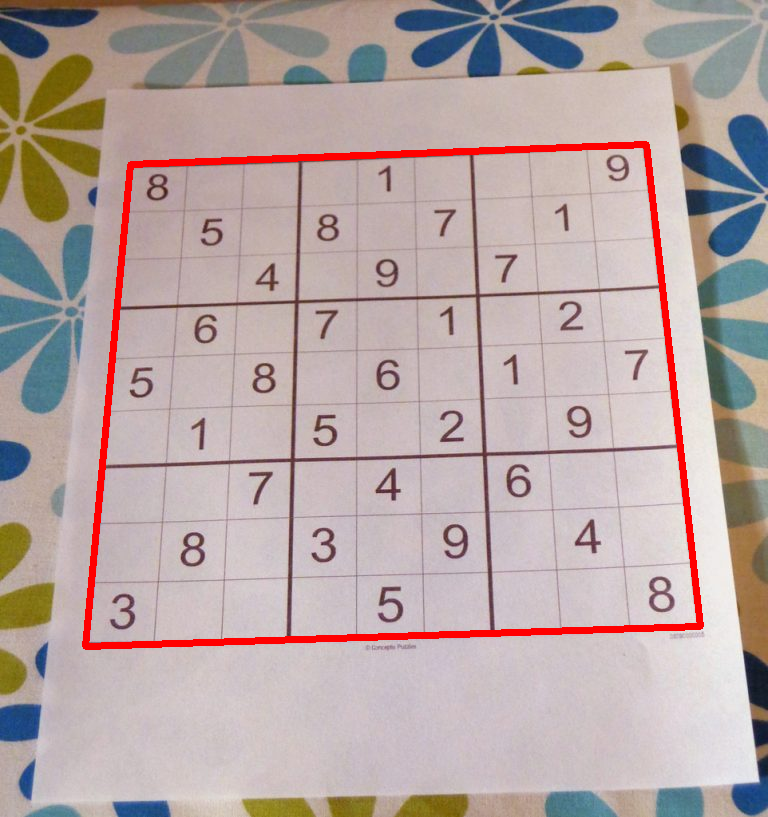

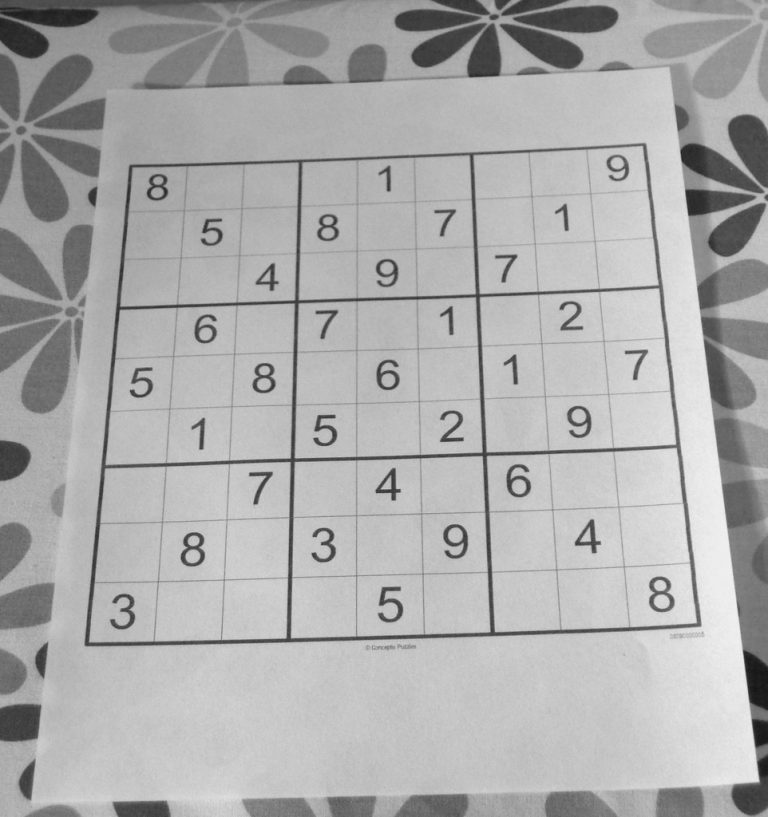

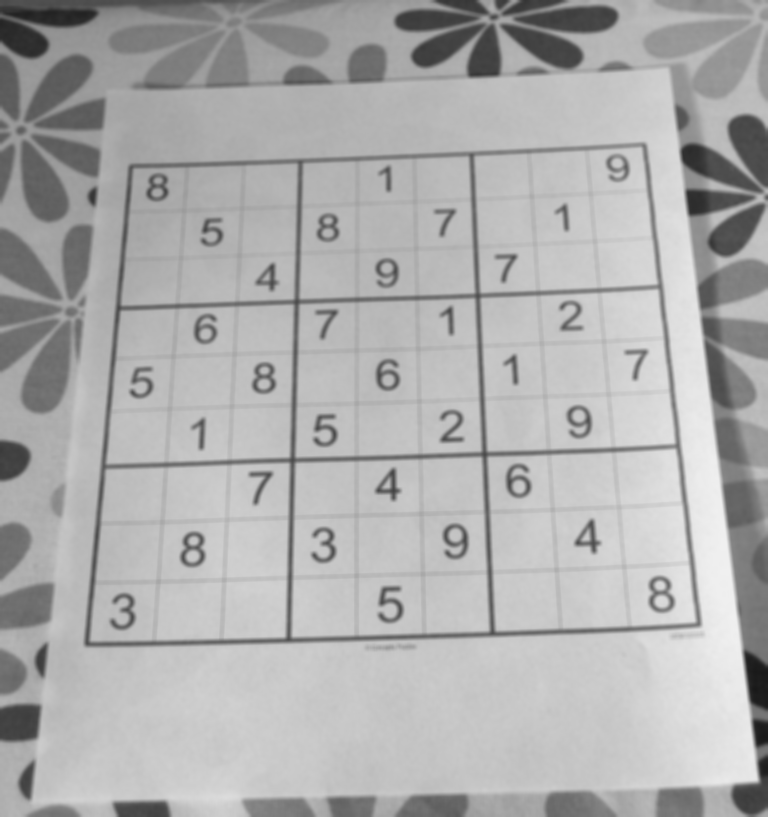

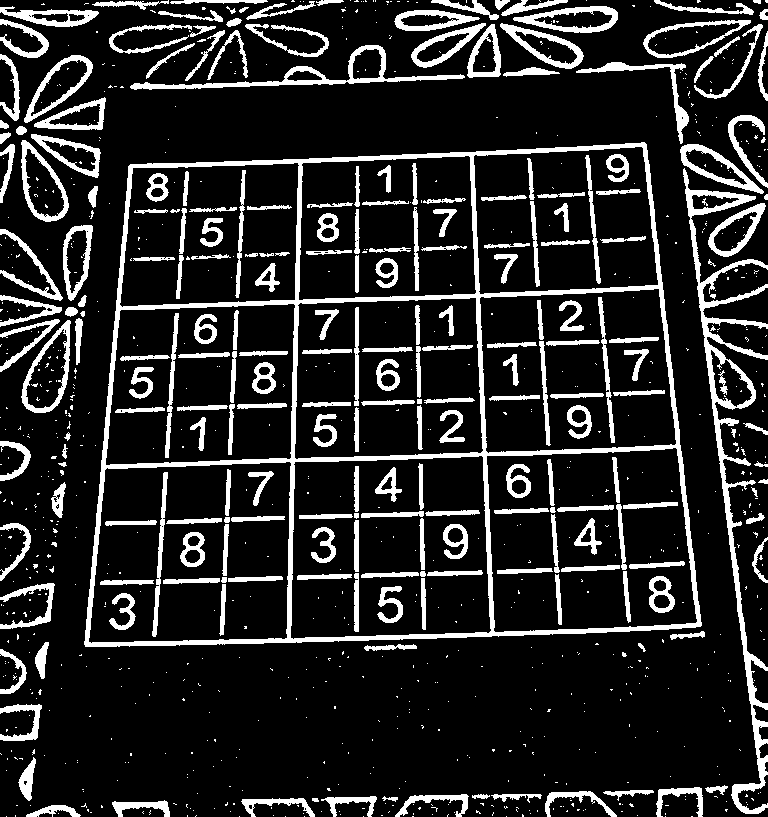

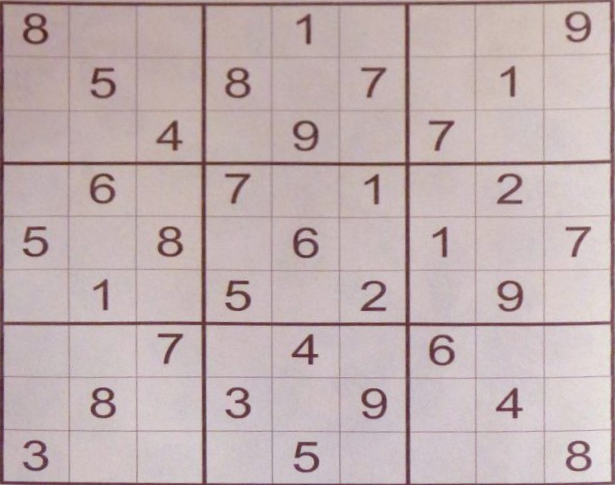

In [9]:
pic = sudoku_detector(image, show = True)

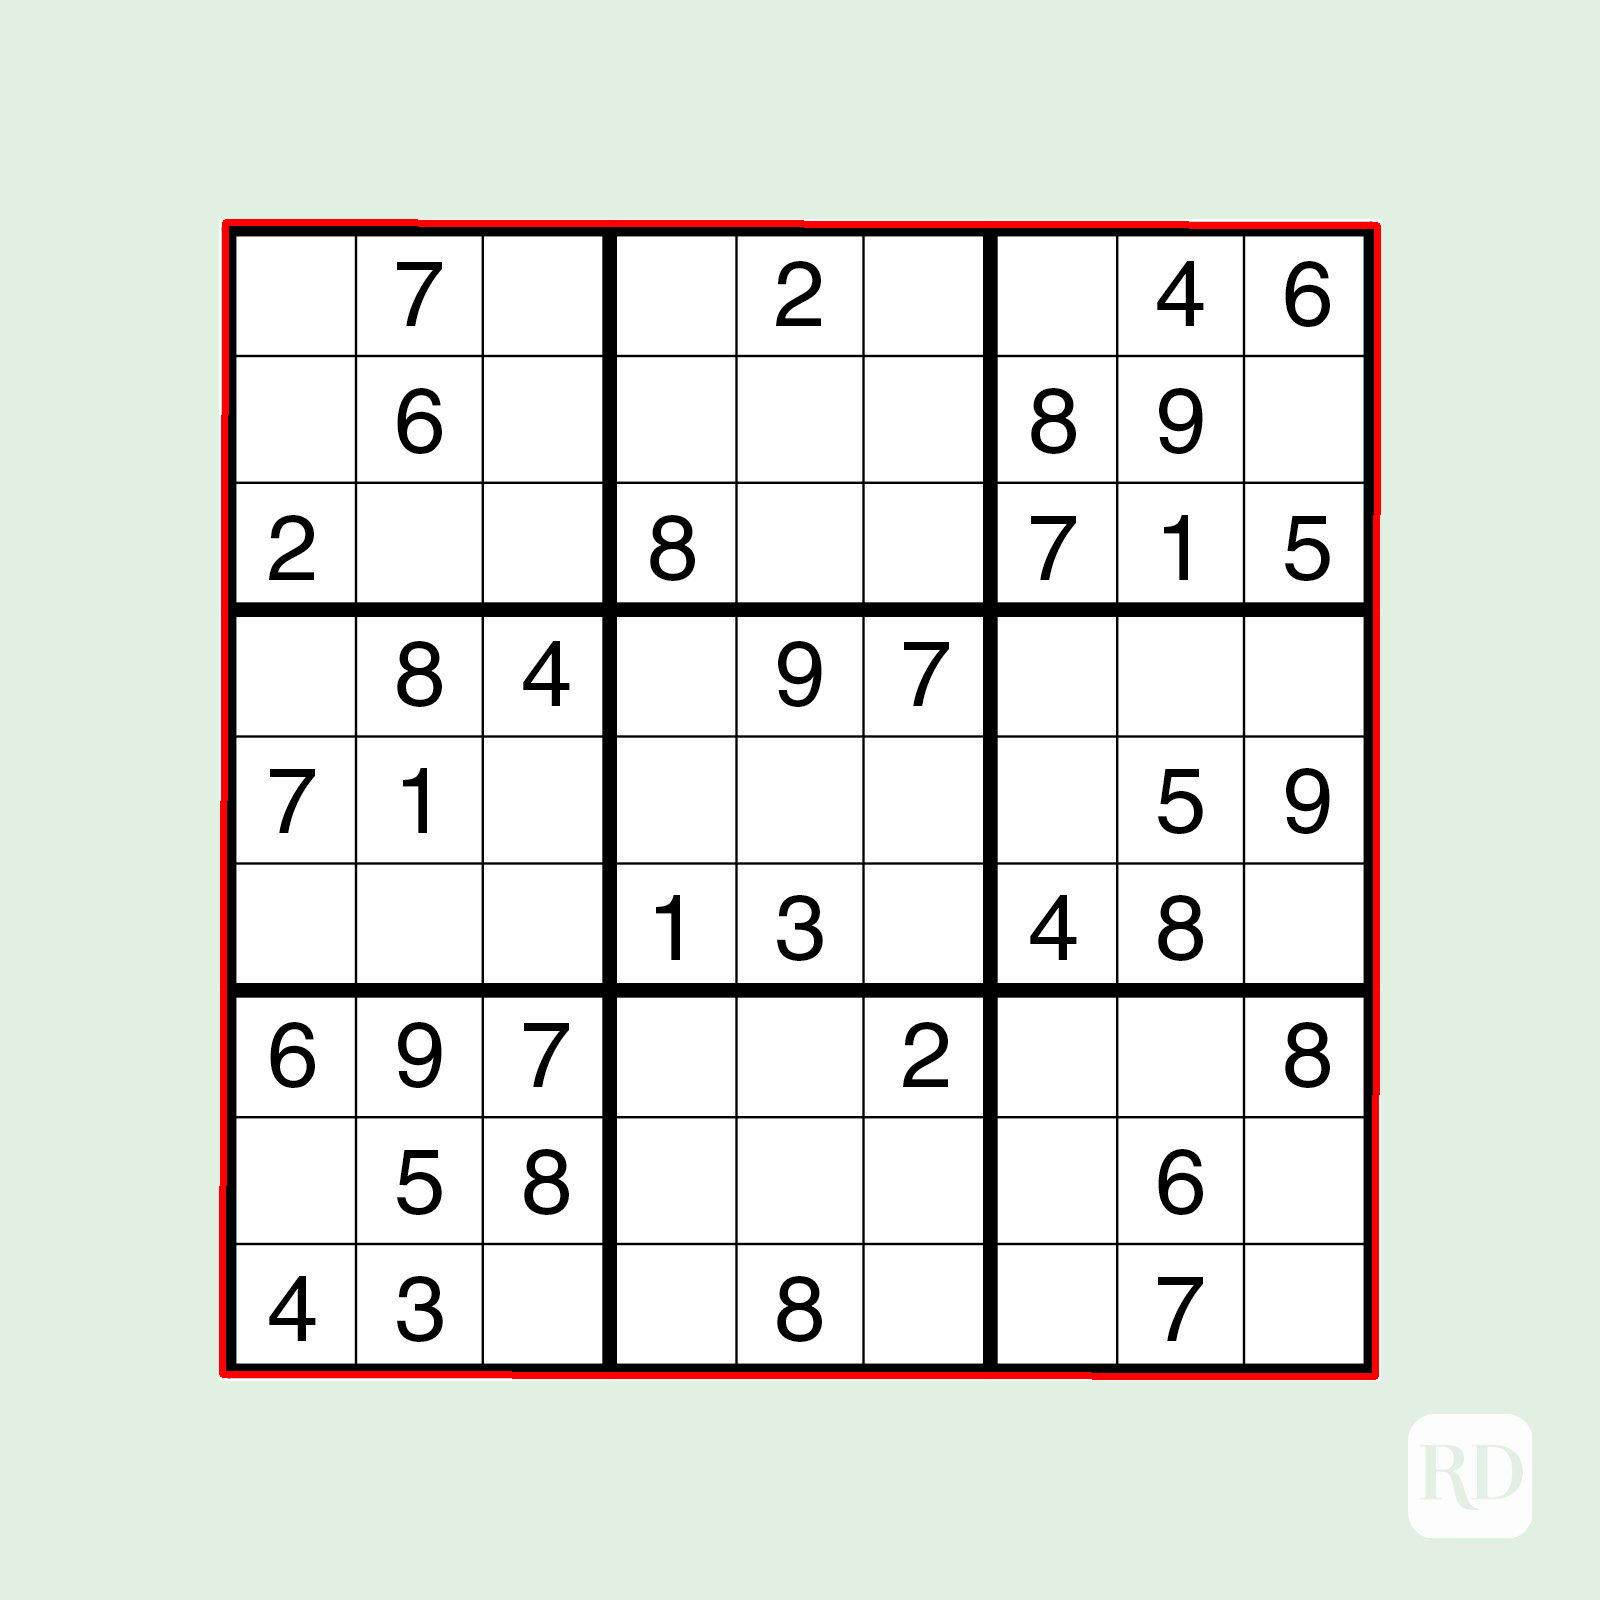

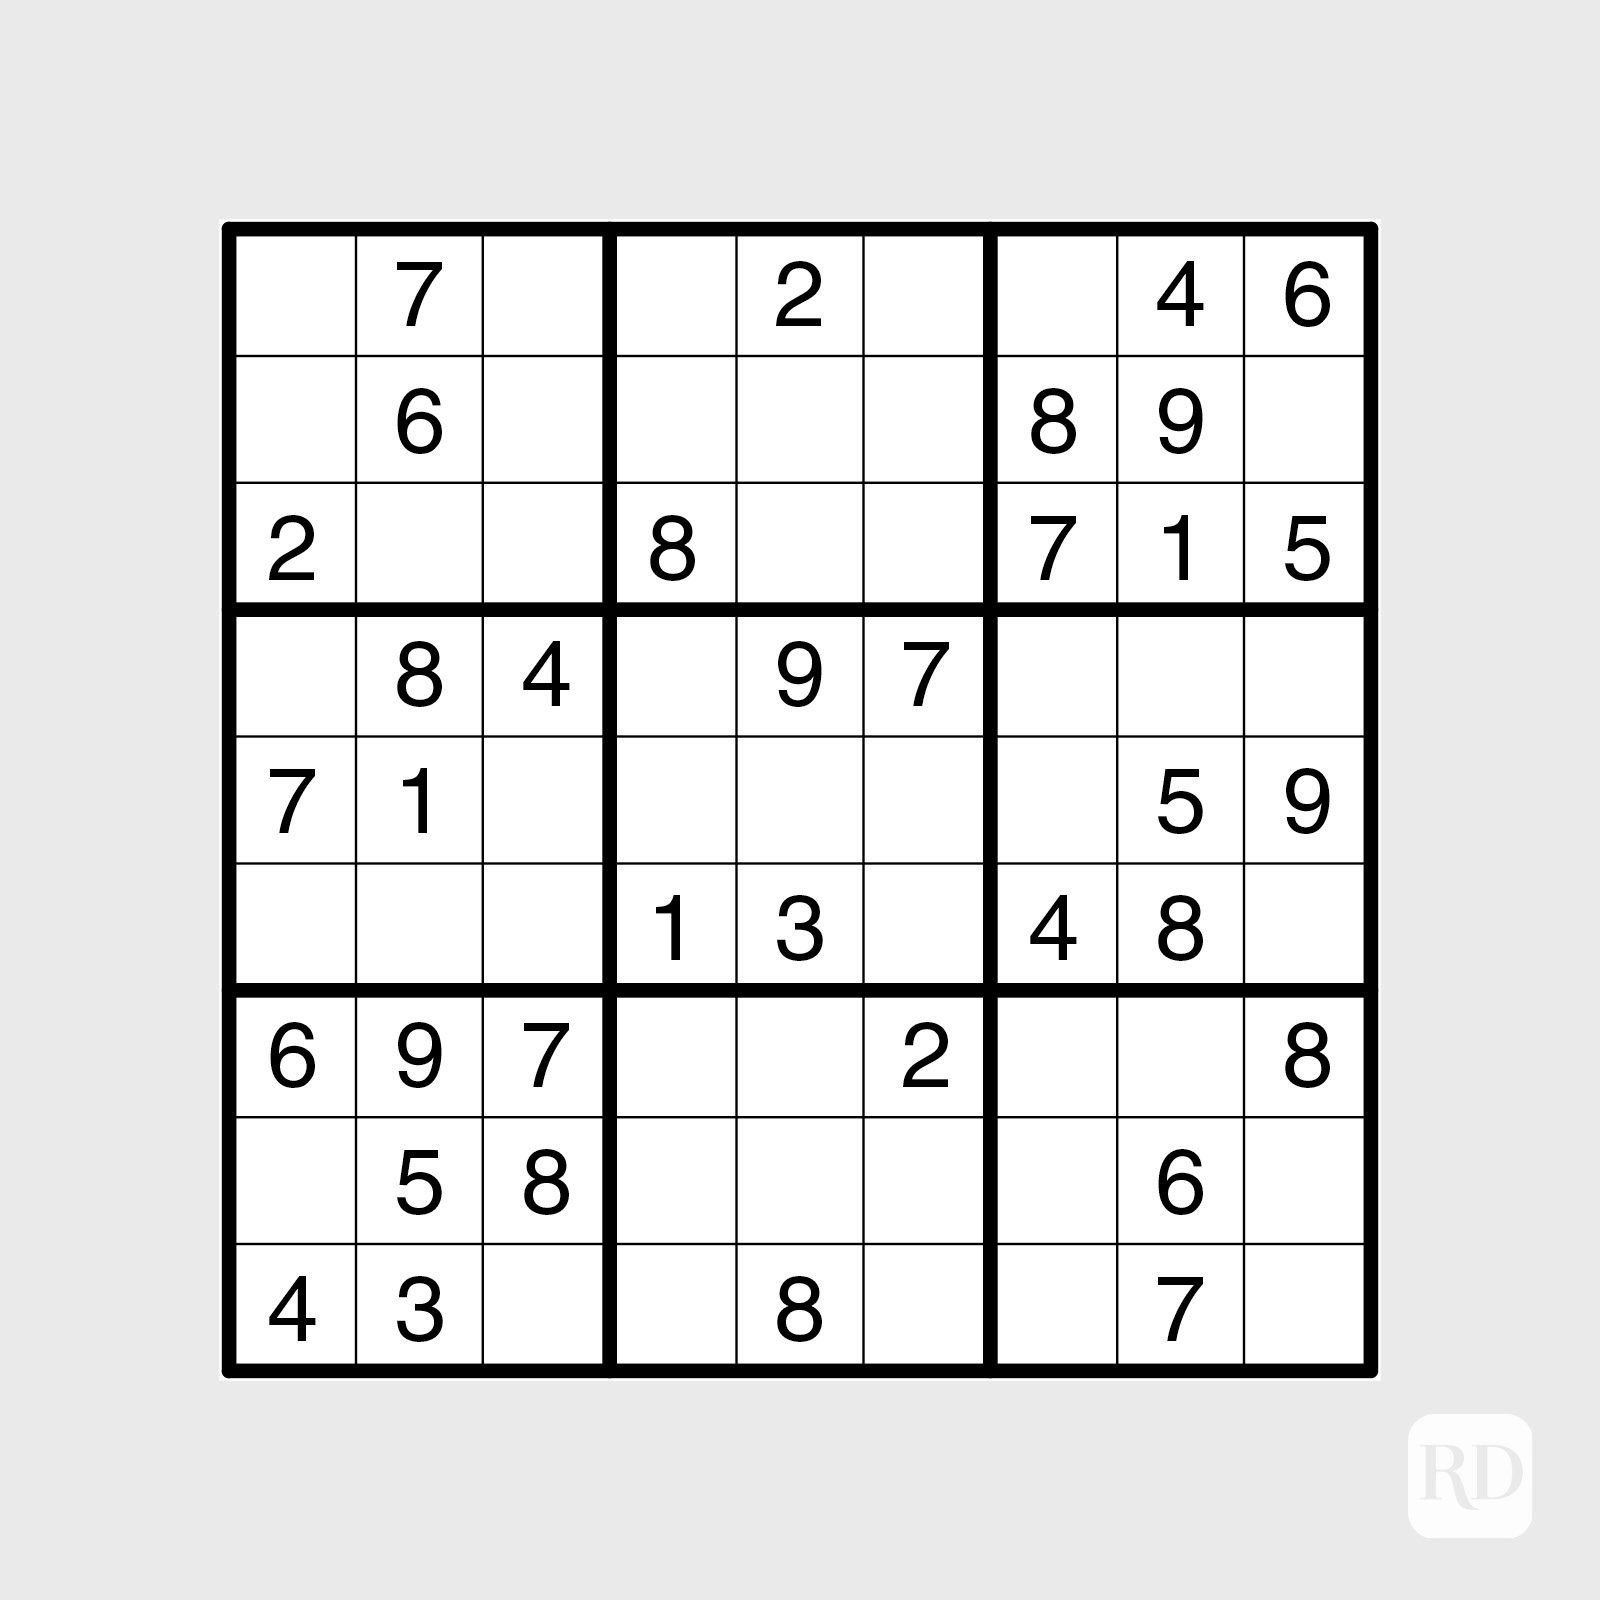

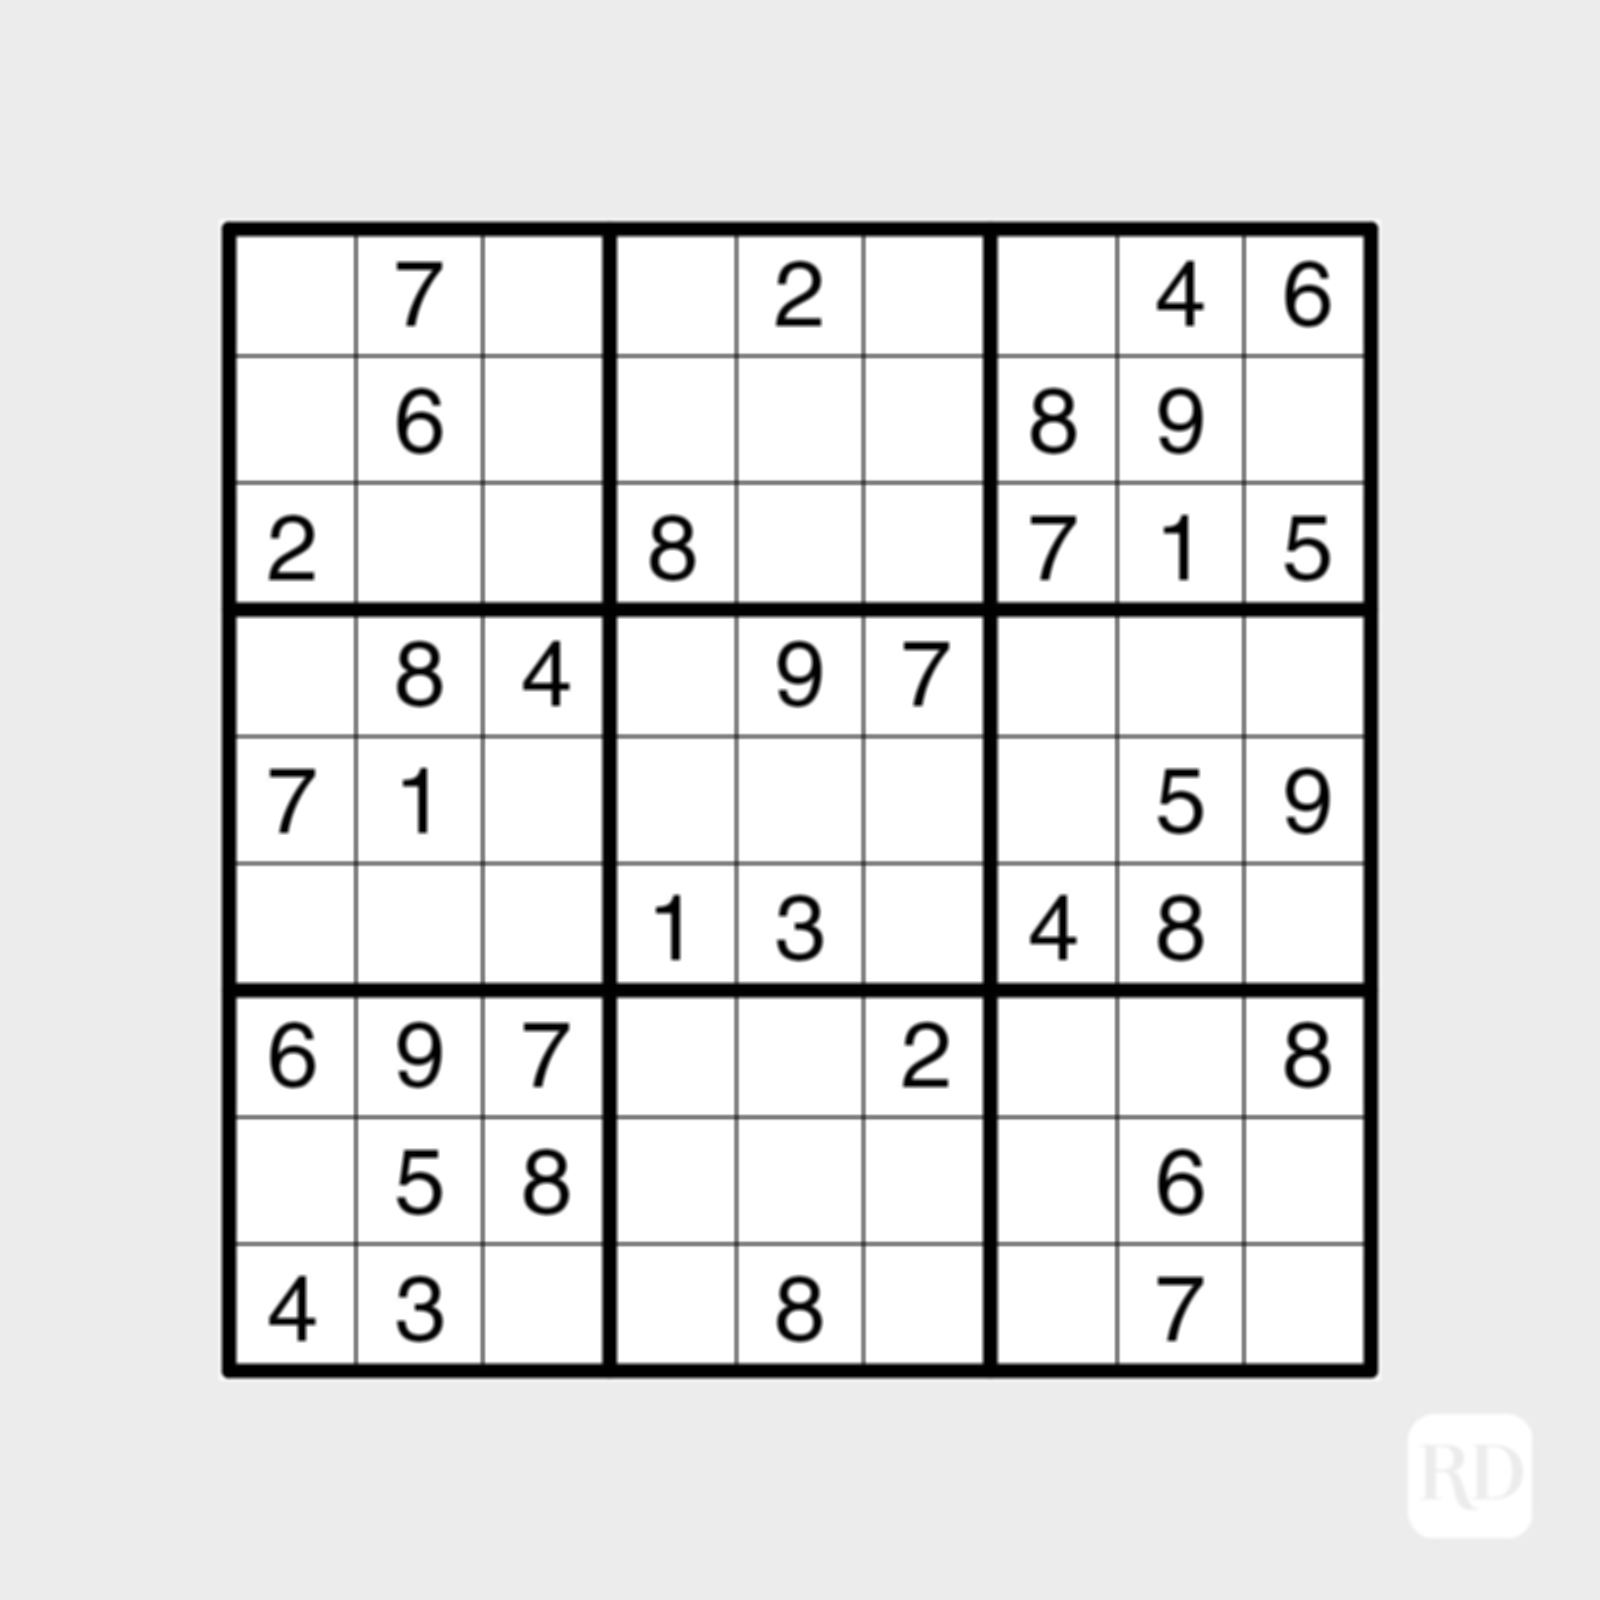

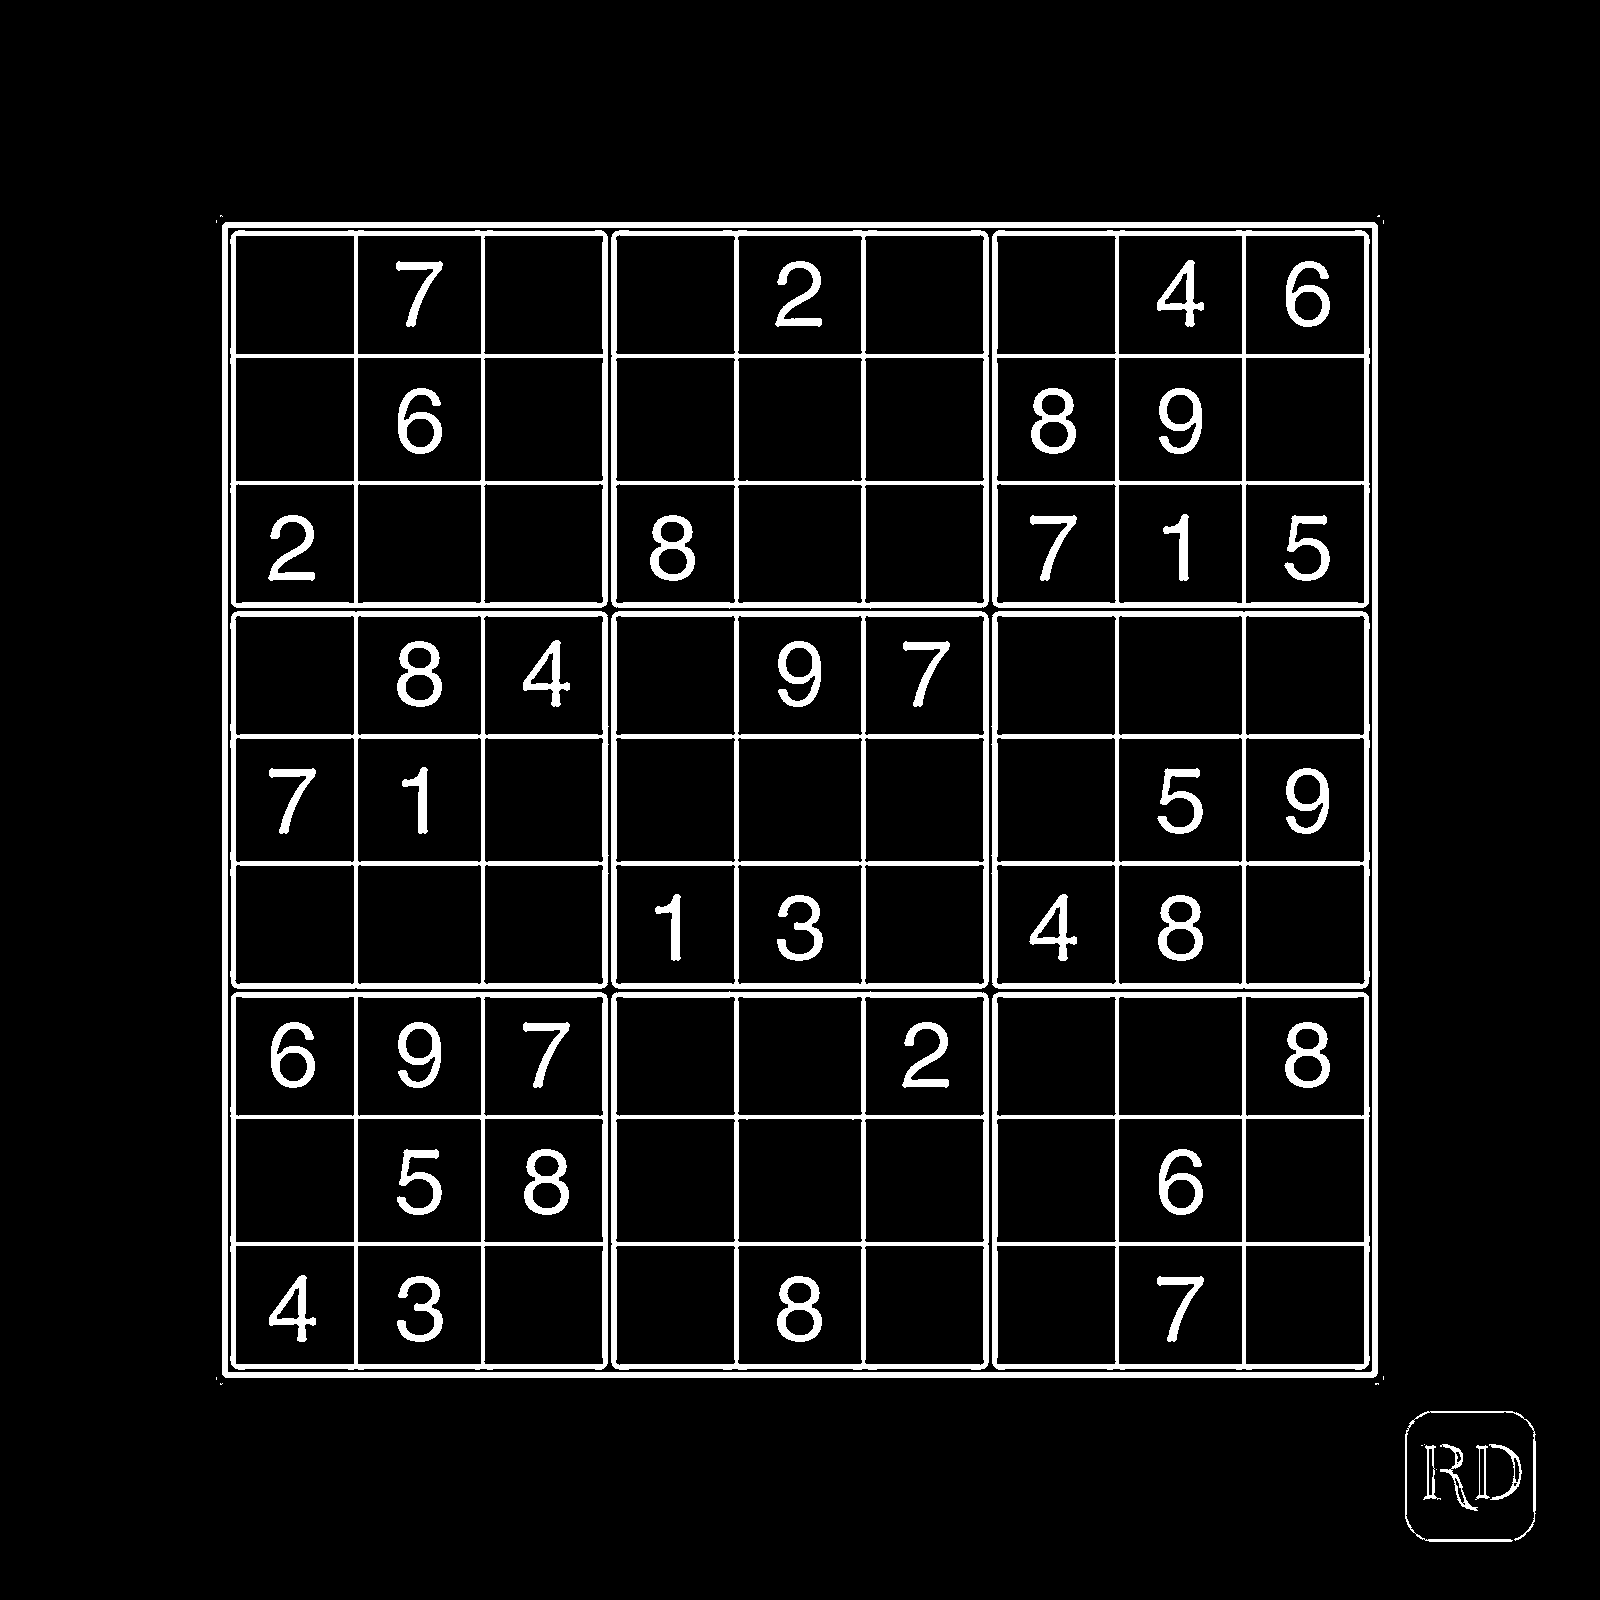

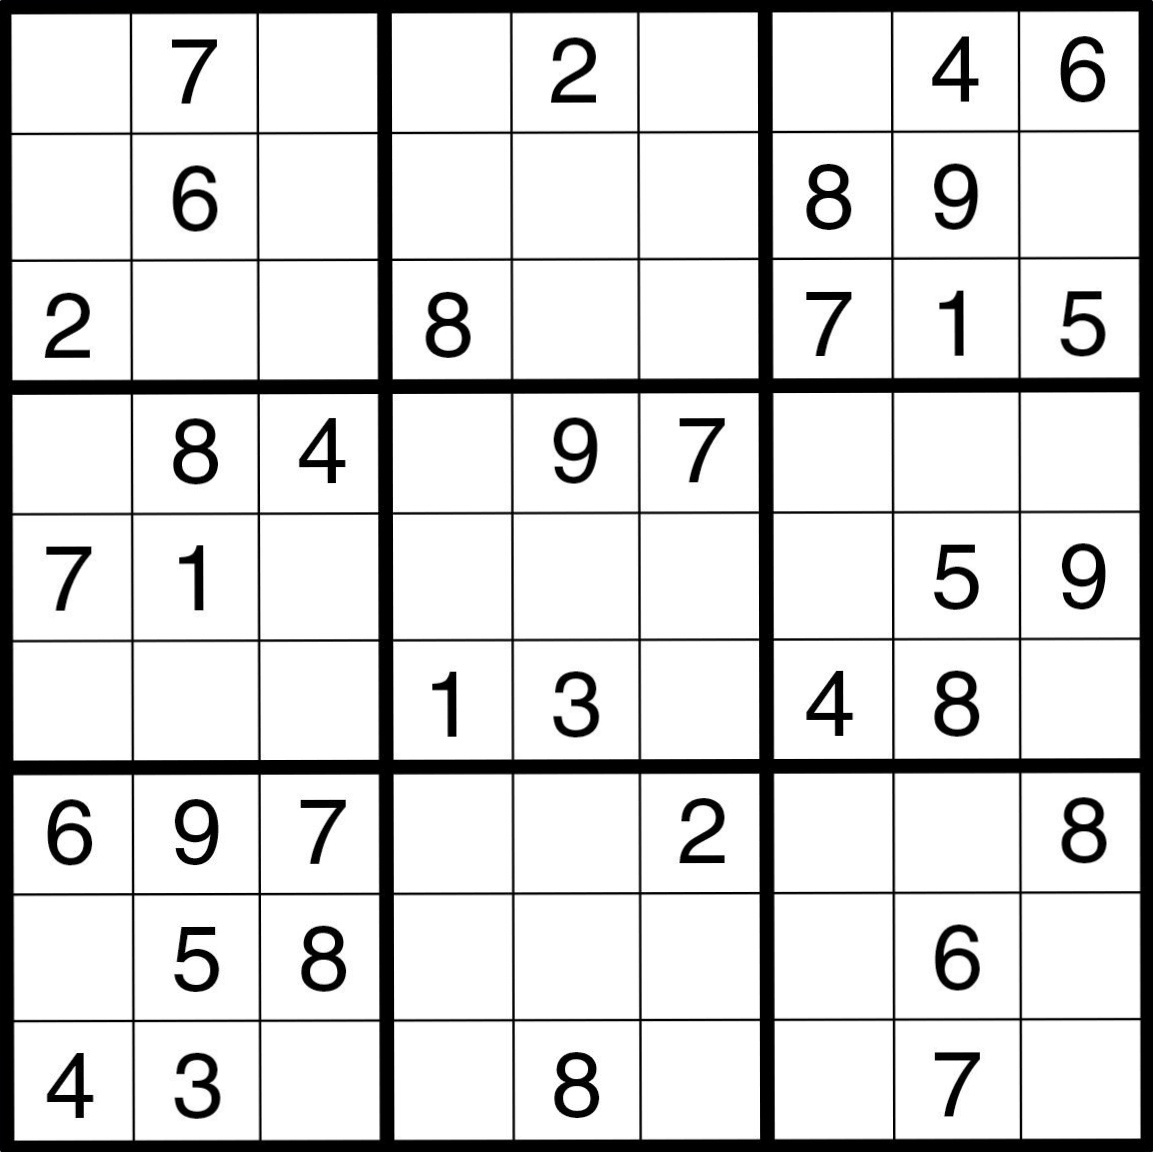

In [10]:
pic1 = sudoku_detector(image1, show = True)

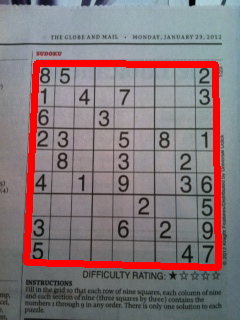

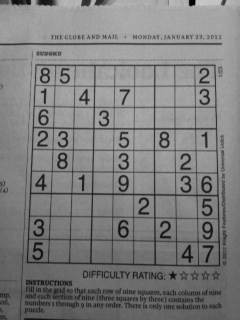

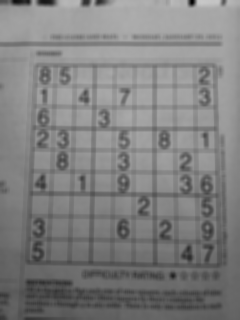

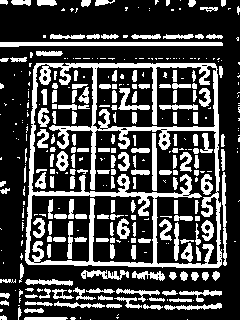

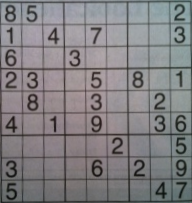

In [11]:
pic2 = sudoku_detector(image2, show = True)

In [27]:
def digit_reader(image,img_size,grid_size,model):
  img = cv2.resize(image,img_size)
  for i in range(grid_size[0]):
    for j in range(grid_size[1]):
      digit = digit_extraction(img,(i,j),img_size,grid_size,extracted_img_size=(28,28),show = True)
      digit = torch.tensor(digit)
  

      

In [28]:
digit_reader(pic,(450,450),(9,9),model)